In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.2
pandas version :  1.2.4
seaborn version :  0.11.1


# Load Data

In [2]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Describe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

# Exploratory Data Analysis

In [5]:
df.apply(lambda x: len(x.unique()))

trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              12375
tags                      12463
views                     31638
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13980
No_tags                      66
desc_len                   2850
len_title                    91
publish_date                219
dtype: int64

False    35611
True      1180
Name: comments_disabled, dtype: int64


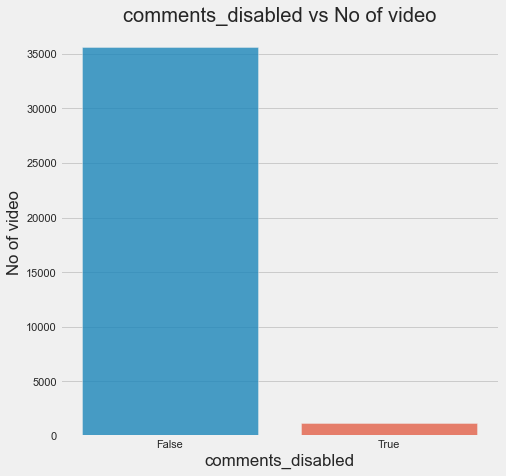

False    36034
True       757
Name: ratings_disabled, dtype: int64


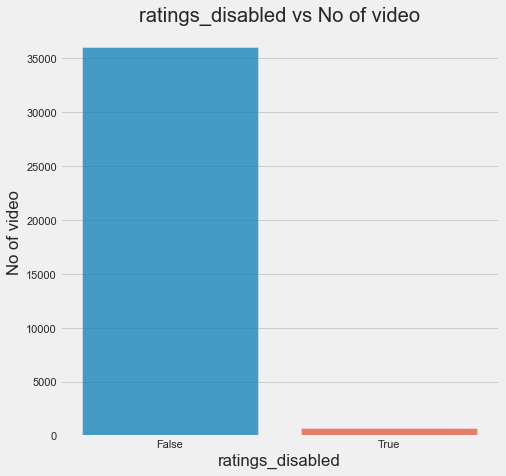

False    36780
True        11
Name: video_error_or_removed, dtype: int64


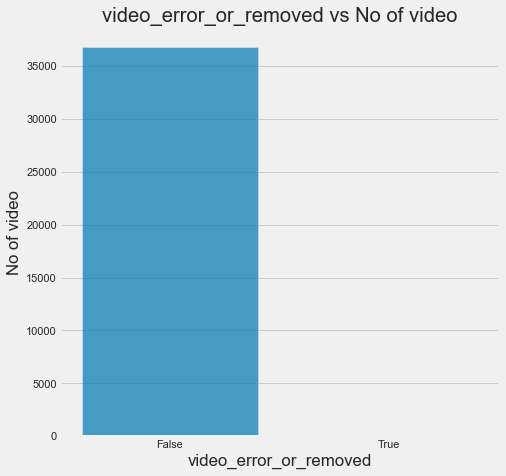

24    16462
25     5173
10     3857
23     3407
22     2494
1      1649
27     1180
26      837
17      712
28      548
43      205
29      105
2        69
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64


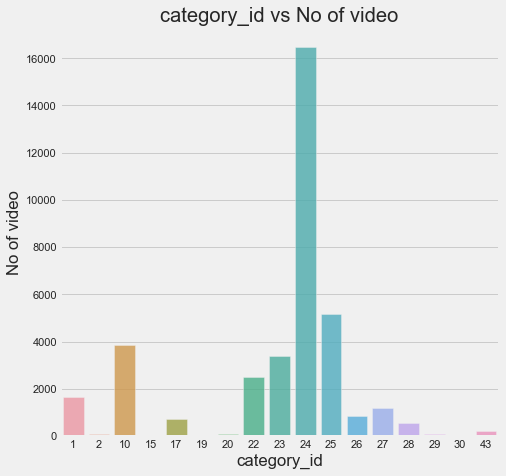

In [6]:
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
    count = df[x].value_counts()
    print(count)
    plt.figure(figsize = (7,7))
    sns.barplot(count.index, count.values, alpha = 0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

# Feature Engineering

In [14]:
#Day of video when published
publish_date = df['publish_date']

df['publish_dayofweek'] = publish_date.dt.dayofweek
df.sample(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,description,No_tags,desc_len,len_title,publish_date,ratio_view_vs_likes,ratio_view_vs_dislikes,ratio_views_vs_comment_count,ratio_likes_vs_dislikes,publish_dayofweek
9335,2018-01-03,Made for Each Other I S2 EP-12 I Contestants t...,Mazhavil Manorama,24,05:00:03,"made for each other season 2|""ep 12""|""Mazhavil...",268153,1428,177,510,...,Subscribe to Mazhavil Manorama now for your da...,3,2303,100,2018-01-02,187.782,1514.989,525.790,8.068,1
24354,2018-04-01,Rangasthalam EMOTIONAL RESPONSE | Lady Fan Cri...,Telugu Filmnagar,24,10:36:23,"Rangasthalam EMOTIONAL RESPONSE|""Lady Fan Crie...",149364,1440,141,104,...,"Rangasthalam EMOTIONAL RESPONSE, Lady Fan Crie...",23,1623,89,2018-03-30,103.725,1059.319,1436.192,10.213,4
17540,2018-02-20,Manasu Mamata | 19th February 2018 |Full Episo...,etvteluguindia,24,14:50:59,"etv daily serials|""etv daily soaps""|""etv ficti...",195110,852,230,79,...,☛ For latest updates on ETV Channels | http://...,24,374,68,2018-02-19,229.002,848.304,2469.747,3.704,0


In [9]:
#ratio of view vs likes  upto 3 decimal
df["ratio_view_vs_likes"]=round(df["views"]/df["likes"],3)
#ratio of view vs dislikes  upto 3 decimal
df["ratio_view_vs_dislikes"]=round(df["views"]/df["dislikes"],3)
#ratio of view vs comment_count  upto 3 decimal
df["ratio_views_vs_comment_count"]=round(df["views"]/df["comment_count"],3)
#ratio of likes vs dislikes  upto 3 decimal
df["ratio_likes_vs_dislikes"]=round(df["likes"]/df["dislikes"],3)

df.sample(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,ratio_view_vs_likes,ratio_view_vs_dislikes,ratio_views_vs_comment_count,ratio_likes_vs_dislikes
9171,2018-01-02,Best Smartphones to Buy! Top Phones in Market ...,Technical Guruji,28,10:19:26,"best smartphone|""top 5 smartphones""|""best smar...",337918,27884,1174,4896,...,False,"Namaskaar Dosto, is video mein maine aapse TOP...",37,2765,58,2017-12-30,12.119,287.835,69.019,23.751
36747,2018-06-14,Bollywood Vs Reality | Harsh Beniwal,Harsh Beniwal,23,14:17:18,"harsh beniwal|""harsh beniwal new video""|""harsh...",3315697,322915,10068,28008,...,False,Hey Everyone Check the latest Bollywood vs rea...,18,499,36,2018-06-11,10.268,329.330,118.384,32.073
28301,2018-04-28,"Lagira Zhala Jee - Episode 313 - April 26, 20...",Ditto TV,24,23:37:59,"zee marathi|""tv""|""television""|""soap""|""episode""...",153251,543,43,34,...,False,Watch Lagira Zhala Jee and other Zee Marathi s...,8,537,58,2018-04-25,282.230,3563.977,4507.382,12.628


In [10]:
print(max(df["ratio_view_vs_likes"]))
print(max(df["ratio_view_vs_dislikes"]))
print(max(df["ratio_views_vs_comment_count"]))
print(max(df["ratio_likes_vs_dislikes"]))

inf
inf
inf
inf


In [19]:
#hapus infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

In [11]:
print(max(df["ratio_view_vs_likes"]))
print(max(df["ratio_view_vs_dislikes"]))
print(max(df["ratio_views_vs_comment_count"]))
print(max(df["ratio_likes_vs_dislikes"]))

inf
inf
inf
inf


4    6097
5    5636
3    5554
0    5263
1    5180
2    5035
6    4026
Name: publish_dayofweek, dtype: int64


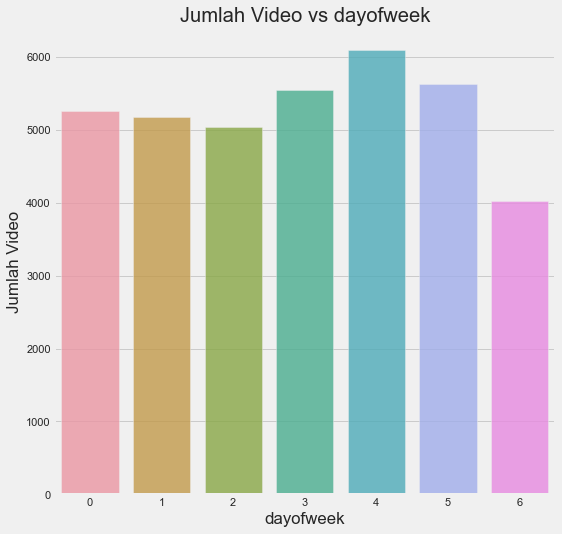

In [15]:
count = df['publish_dayofweek'].value_counts()
print(count)
plt.figure(figsize=(8,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Jumlah Video vs dayofweek')
plt.ylabel('Jumlah Video')
plt.xlabel('dayofweek')
plt.show()

## Correlation Matrix

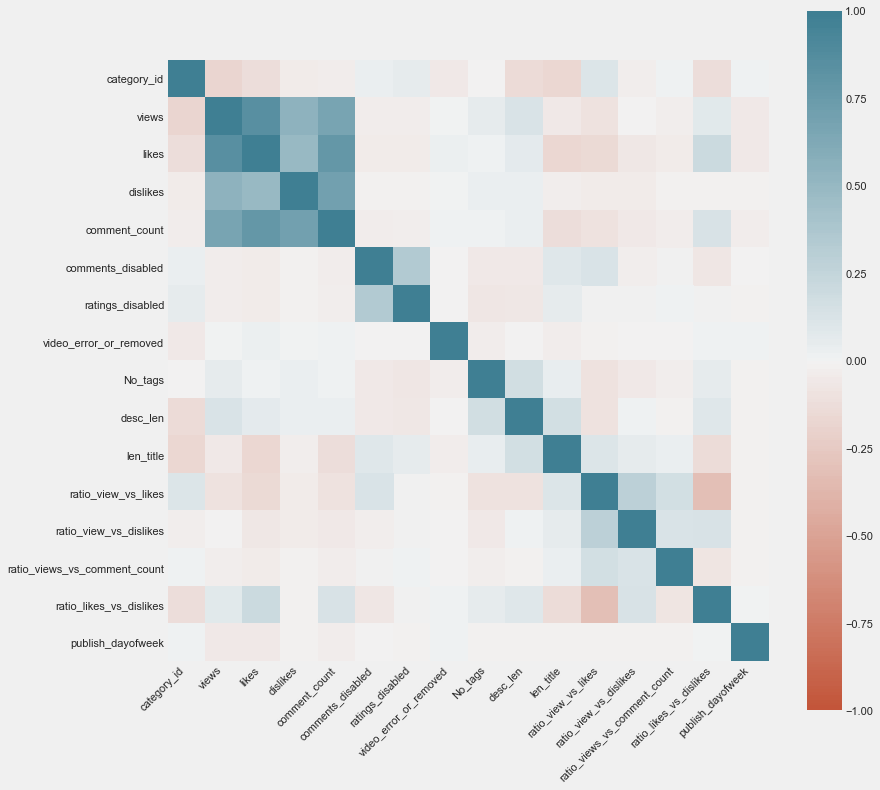

In [16]:
data = df

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
# Drop non correlated feature

df.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

Conclusion :
1. Tambahan feature 'publish_dayofweek' => digunakan untuk memudahkan kami menganalisa pada hari apa video paling banyak dipublish dengan visualisasi yang mudah dipahami.

2. Tambahan feature :
                    "ratio_view_vs_likes", 
                    "ratio_view_vs_dislikes",
                    "ratio_views_vs_comment_count",
                    "ratio_likes_vs_dislikes" 
   Diharapkan dapat menjadi alat ukut kami dalam menganalisa/prediksi keterkaitan jumlah view terhadap likes, dislikes, comment_count, dislikes.                                        
3. Menghapus feature yang tidak berkolerasi.    